# Tarea 5. Construyendo la frontera de mínima varianza para dos activos.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="600px" height="400px" />

**Resumen.**
> En esta tarea, construirás la frontera de mínima varianza para dos activos riesgosos usando los datos de mercados internacionales que usamos en la clase 10.

> Construirás portafolios que consisten de dos activos riesgosos, graficarás la frontera de mínima varianza y encontrarás el portafolio de mínima varianza. Repetirás luego el ejercicio para otro par de activos y compararás los beneficios de diversificación en cada caso.

> Por favor, revisar la clase 10 para los datos. 

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea5_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea5_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Copiar y pegar los datos de rendimientos esperados, volatilidades y correlaciones de mercados internacionales brindados en la Clase 10.

1. Mostrar los DataFrame con los datos (5 puntos).
2. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (5 puntos).

In [161]:
# Importamos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

In [162]:
# Resumen en base anual de rendimientos esperados y volatilidades
ret = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
ret.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
ret.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

ret

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


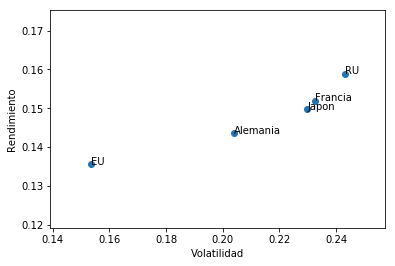

In [163]:
X, Y = ret.loc['Volatilidad'],ret.loc['Media']
plt.scatter(X, Y)
plt.ylabel('Rendimiento')
plt.xlabel('Volatilidad')
for i in range(len(X)):
    plt.text(X[i],Y[i],X.index[i])

In [164]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=ret.columns, index=ret.columns)
corr

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


## 2. Portafolios con Japón y Reino Unido (30 puntos)

Usando los datos del punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los mercados Japoneses y del Reino Unido como activos riesgosos. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [165]:
# Vector de w variando entre 0 y 1 con n pasos
N = 101
w = np.linspace(0,1,N)
# Rendimientos esperados individuales
# Activo1: RU, Activo2:Japon
E1 = ret.loc['Media','RU']
E2 = ret.loc['Media','Japon']
# Volatilidades individuales
s1 = ret.loc['Volatilidad','RU']
s2 = ret.loc['Volatilidad','Japon']
# Correlacion
r12_1 = corr.loc['EU','Japon']
E1, E2, s1, s2, r12_1

(0.1589, 0.1497, 0.243, 0.2298, 0.2663)

In [166]:
# Crear un DataFrame cuyas columnas sean rendimiento
# y volatilidad del portafolio para cada una de las w
# generadas
Port = pd.DataFrame(data={'w':w,
                                 'Media':w*E1 + (1-w) * E2,
                                 'Vol':((w*s1)**2 + ((1-w) * s2)**2 + 2 * w * (1-w) * s1 * s2 * r12_1)**0.5})
Port.head()

,w,Media,Vol
0,0.00,0.149700,0.229800
1,0.01,0.149792,0.228161
2,0.02,0.149884,0.226547
3,0.03,0.149976,0.224957
4,0.04,0.150068,0.223393


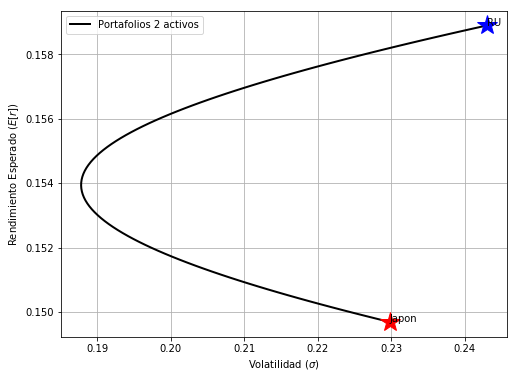

In [284]:
# Graficar 
plt.figure(figsize=(8,6))
plt.plot(Port['Vol'],Port['Media'],'k',lw=2, label = 'Portafolios 2 activos')
plt.plot(s1,E1, 'b*',ms = 20)
plt.plot(s2,E2, 'r*',ms = 20)
plt.text(s1,E1,'RU')
plt.text(s2,E2,'Japon')
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento Esperado ($E[r]$)')
plt.legend(loc='best')
plt.grid()

In [168]:
def varianza(w,s1, s2, r12):
    return (w*s1)**2 + ((1-w) * s2)**2 + 2 * w * (1-w) * s1 * s2 * r12

In [169]:
# Calcular w_min y mostrar...
s12 = s1 * s2 * r12_1
w_min1 = (s2**2 - s12)/(s1**2 + s2**2 - 2*s12)
w_min1, 1-w_min1

(0.461999081708774, 0.538000918291226)

In [170]:
E_min1 = w_min1 * E1 + (1-w_min1) *E2
s_min1 = varianza(w_min1, s1, s2, r12_1)**0.5
#s_min =  min.fun**0.5
E_min1, s_min1

(0.15395039155172074, 0.18783226907134618)

Si se invierte un 46.19% de los activos en Reino Unido y el 53.81% en Japón, se esperaría tener un rendimiento de 15.39% anual, mientras que se esperaría una volatilidad de 0.1878. 

## 3. Mismos activos, distinta correlación (30 puntos)

En este punto se usarán los mismos activos (Japón y Reino Unido) con sus rendimientos esperados y volatilidades, solo que supondremos que el coeficiente de correlación entre sus rendimiento es de 0.5.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos con el nuevo supuesto de correlación. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [171]:
# Recordando rendimientos esperados, volatilidades y modificando correlación.
r12_2 = 0.5
E1, E2, s1, s2, r12_2

(0.1589, 0.1497, 0.243, 0.2298, 0.5)

In [172]:
# Crear un DataFrame cuyas columnas sean rendimiento
# y volatilidad del portafolio para cada una de las w
# generadas
Port2 = pd.DataFrame(data={'w':w,
                                 'Media':w*E1 + (1-w) * E2,
                                 'Vol':((w*s1)**2 + ((1-w) * s2)**2 + 2 * w * (1-w) * s1 * s2 * r12_2)**0.5})
Port2.head()

,w,Media,Vol
0,0.00,0.149700,0.229800
1,0.01,0.149792,0.228727
2,0.02,0.149884,0.227673
3,0.03,0.149976,0.226639
4,0.04,0.150068,0.225625


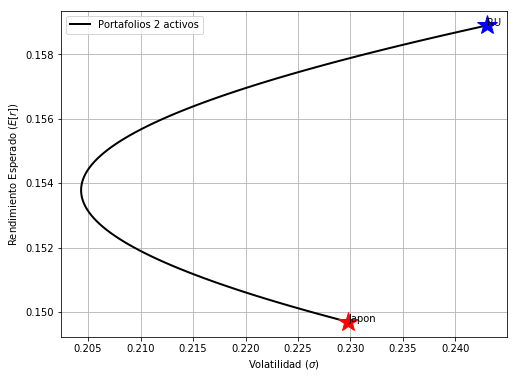

In [283]:
# Graficar 
plt.figure(figsize=(8,6))
plt.plot(Port2['Vol'],Port2['Media'],'k',lw=2, label = 'Portafolios 2 activos')
plt.plot(s1,E1, 'b*',ms = 20)
plt.plot(s2,E2, 'r*',ms = 20)
plt.text(s1,E1,'RU')
plt.text(s2,E2,'Japon')
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento Esperado ($E[r]$)')
plt.legend(loc='best')
plt.grid()

In [174]:
# Calcular w_min y mostrar...
s12 = s1 * s2 * r12_1
w_min2 = (s2**2 - s12)/(s1**2 + s2**2 - 2*s12)
w_min2, 1-w_min2

(0.461999081708774, 0.538000918291226)

In [175]:
E_min2 = w_min2 * E1 + (1-w_min2) *E2
s_min2 = varianza(w_min2, s1, s2, r12_2)**0.5
#s_min =  min.fun**0.5
E_min2, s_min2

(0.15395039155172074, 0.20437303707320933)

## 4. Gráficos y conclusiones (30 puntos)

1. Usando sus respuestas para los puntos 2 y 3, grafique las dos fronteras encontradas en una sola gráfica, además de los puntos correspondientes a los activos individuales, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, ¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?, ¿cómo puede explicar esta diferencia? (15 puntos).

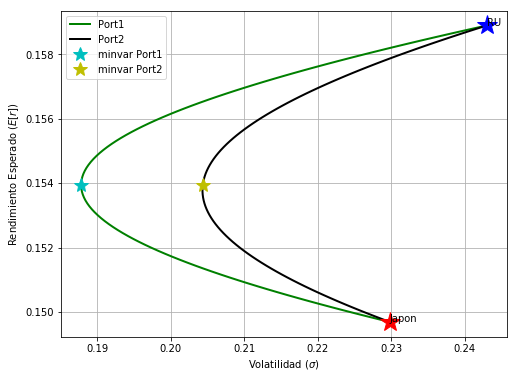

In [282]:
# Graficar 
plt.figure(figsize=(8,6))
plt.plot(Port['Vol'],Port['Media'],'g',lw=2, label = 'Port1')
plt.plot(Port2['Vol'],Port2['Media'],'k',lw=2, label = 'Port2')
plt.plot(s_min1,E_min1,'c*', ms = 15,label = 'minvar Port1')
plt.plot(s_min2,E_min2,'y*', ms = 15,label = 'minvar Port2')
plt.plot(s1,E1, 'b*',ms = 20)
plt.plot(s2,E2, 'r*',ms = 20)
plt.text(s1,E1,'RU')
plt.text(s2,E2,'Japon')
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento Esperado ($E[r]$)')
plt.legend(loc='best')
plt.grid()

En términos de diversificación... considero que se da la misma diversificación, sin embargo, la diversificación del Portafolio 1 (debido a que es menos correlacionada) genera mayores efectos en la relación rendimiento/riesgo. Es interesante notar que se mantiene la misma proporción invertida en cada uno de los portafolios, sin embargo, debido a los efectos de la correlación, los efectos son muy diferentes. 

## 5. El portafolio de mínima varianza con los 5 Activos. (0 puntos)

1. Usando las correlaciones y las varianzas de los activos, encuentre el peso 'óptimo' que deberá ser invertido en cada activo para minimizar la volatilidad del portafolio (0 puntos).

In [248]:
# Función objetivo
def varianza(W, Sigma):
    # W son los pesos en cada activo. 0<=W<=1, sum(W)=1
    # Sigma es la matriz de covarianzas
    return (W.T.dot(Sigma).dot(W))

# Para construir matriz de covarianzas
def Covarianza(I, Corr):
    # I es el vector de Varianzas.
    # Corr es la matriz de correlaciones
    J = np.eye(len(I))
    np.fill_diagonal(J,I)
    return J.T.dot(Corr).dot(J)

In [178]:
# Matriz de covarianza
I = ret.loc['Volatilidad']
Sigma = Covarianza(I, corr)
Sigma

array([[0.02356225, 0.01866144, 0.01568916, 0.01151538, 0.00939355],
       [0.01866144, 0.059049  , 0.03060847, 0.02112173, 0.01999681],
       [0.01568916, 0.03060847, 0.05400976, 0.02856943, 0.02095099],
       [0.01151538, 0.02112173, 0.02856943, 0.04153444, 0.01715502],
       [0.00939355, 0.01999681, 0.02095099, 0.01715502, 0.05280804]])

In [179]:
# Si se le diera un peso inicial de 1/5 a cada activo obtendríamos la sig. varianza

w0 = np.ones((5,1))/5
varianza(w0,Sigma)

array([[0.0247315]])

In [183]:
# Solución
bnd = ((0,1),(0,1),(0,1),(0,1),(0,1),)
Min=opt.minimize(fun=varianza, x0=w0, args=(Sigma), bounds=bnd)
Min

      fun: 0.0
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.356225e-10, 5.904900e-10, 5.400976e-10, 4.153444e-10,
       5.280804e-10])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 5
   status: 0
  success: True
        x: array([0., 0., 0., 0., 0.])

Sugiere que si no queremos tener riesgo alguno no se debería invertir en ninguna de las acciones.

In [185]:
# Solución
bnd = ((0,1),(0,1),(0,1),(0,1),(0,1),)
Min=opt.minimize(fun=varianza, x0=w0, args=(Sigma), bounds=bnd, constraints={'type': 'eq', 'fun': lambda w: np.sum(w)-1})
Min

     fun: 0.018617763910885928
     jac: array([0.03718246, 0.03881475, 0.03859101, 0.03755156, 0.0370423 ])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.61779705, 0.        , 0.        , 0.20939436, 0.17280859])

In [186]:
best = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Proporcion'])
best.loc['Proporcion'] = Min.x

best

,EU,RU,Francia,Alemania,Japon
Proporcion,0.617797,0,0,0.209394,0.172809


In [194]:
ret

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [271]:
#Rendimiento esperado con el portafolio construido con los 5 activos.
E_best = (ret.loc['Media']*Min.x).sum()
E_best

0.13962903689371375

In [272]:
#Varianza con el portafolio construido con los 5 activos.
s_best = varianza(Min.x,Sigma)**.5
s_best

0.1364469270848044

## 6. Graficar (0 puntos) 

In [267]:
# Recibe matriz y hace que todas sus filas sumen 1. 
def suma_uno(mat):
    # mat es la matriz que se quiere hacer que su suma sea = 1
    est = np.ones(mat.shape)
    for i in np.arange(len(est)):
        est[i] = mat[i]/mat[i].sum()
    return est

# Función objetivo
def varianza(w, Sigma):
    # w es un vector con los pesos en cada activo. 0<=W<=1, sum(W)=1
    # Sigma es la matriz de covarianzas
    return (w.T.dot(Sigma).dot(w))

# Varianza de cada peso de la matriz
def Var(W):
    # W es la matriz de pesos (0<=W<=1, sum(W)=1)
    var = np.ones(W.shape[0])
    for i in np.arange(var.shape[0]):
        var[i] = varianza(W[i],Sigma)
    return var

# Para construir matriz de covarianzas
def Covarianza(I, Corr):
    # I es el vector de Varianzas.
    # Corr es la matriz de correlaciones
    J = np.eye(len(I))
    np.fill_diagonal(J,I)
    return J.T.dot(Corr).dot(J)

In [278]:
n = 100000
Rand = suma_uno(np.random.random((n,5)))
Esperado = np.zeros((5,1))
Esperado[:,0] = ret.loc['Media']
Volatilidad = np.zeros((5,1))
Volatilidad[:,0] = ret.loc['Volatilidad']
X = Var(Rand)**.5
Y = Rand.dot(Esperado)

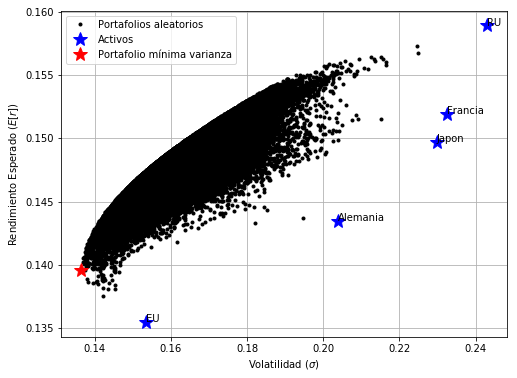

In [299]:
# Graficar 

plt.figure(figsize=(8,6))
plt.plot(X,Y,'k.',lw=2, label = 'Portafolios aleatorios')
plt.plot(ret.loc['Volatilidad'],ret.loc['Media'],'b*', ms=15,label='Activos')
plt.plot(s_best,E_best,'r*', ms = 15,label = 'Portafolio mínima varianza')
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento Esperado ($E[r]$)')
plt.legend(loc='best')
plt.grid()
for i in range(ret.shape[1]):
    plt.text(ret.loc['Volatilidad'][i],ret.loc['Media'][i],ret.loc['Media'].index[i])

In [298]:
ret.shape

(2, 5)

Personalmente creo que yo no tomaría el portafolio con mínima varianza, ya que existen portafolios que pareciera que sacrificando tan solo un poco más (en términos de riesgo) se obtienen buenas promesas de rendimiento.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>